# **Image-Processing Project**

## **Description**
This project focuses on developing an **automated system for lung cancer detection** using medical imaging techniques and advanced image preprocessing methods. The main objectives include:

1. **Image Preprocessing**: Enhancing the quality of lung X-ray and CT scan images.
2. **Feature Extraction**: Extracting meaningful features to identify patterns relevant to lung cancer.
3. **Machine Learning Classification**: Feeding the processed images into a machine learning model to classify the presence of lung cancer.

The ultimate goal is to improve the **accuracy and efficiency of early lung cancer diagnosis**, which could significantly aid medical professionals in providing timely treatment.

---

## Group Members
- **Aman Singh** (23122105)  
- **Dipanwita Das** (23122046)
- **Vedant Nehal** (23122141)


# **Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# **Importing Libraries**

In [17]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

This imports key libraries:

**numpy, os:** General-purpose libraries for numerical computations and file handling.  
**seaborn and matplotlib:** For visualization.  
**cv2:** For image processing.  

# **Defining Constants and Path**

In [19]:
class_names = ['normal','abnormal']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
directory = '/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/test'
nb_classes = len(class_names)
print(f"Number of Classes: {nb_classes}")
print(f"Class Names Label: {class_names_label}")
IMAGE_SIZE = (150, 150)


Number of Classes: 2
Class Names Label: {'normal': 0, 'abnormal': 1}


**class_names:** Labels for image categories.  
**class_names_label:** A dictionary mapping categories to numerical labels.   

# **Image Dimension Analysis**

In [6]:
categories = class_names  # Assuming categories are the same as class_names

# Initialize size data dictionary
size_data = {}

# Iterate through class names
for i in class_names:
    path = os.path.join(directory, i)
    if not os.path.exists(path):
        print(f"Warning: Path {path} does not exist. Skipping.")
        continue

    class_num = categories.index(i)
    temp_dict = {}

    for file in os.listdir(path):
        filepath = os.path.join(path, file)

        try:
            # Read image using cv2
            image = cv2.imread(filepath)
            if image is None:
                print(f"Warning: Unable to read file {filepath}. Skipping.")
                continue
            height, width, channels = image.shape

            size_key = f"{height} x {width}"
            if size_key in temp_dict:
                temp_dict[size_key] += 1
            else:
                temp_dict[size_key] = 1

        except Exception as e:
            print(f"Error reading file {filepath}: {e}")
            continue

    size_data[i] = temp_dict

# Display size data
size_data

{'normal': {'552 x 800': 4,
  '481 x 619': 6,
  '475 x 543': 6,
  '234 x 366': 6,
  '251 x 371': 5,
  '475 x 600': 4,
  '358 x 400': 4,
  '517 x 668': 2,
  '491 x 629': 4,
  '270 x 393': 8,
  '341 x 441': 4,
  '345 x 440': 4,
  '419 x 538': 6,
  '338 x 438': 8,
  '425 x 453': 2,
  '462 x 586': 2,
  '533 x 847': 4,
  '508 x 665': 2,
  '225 x 224': 4,
  '210 x 279': 2,
  '356 x 478': 2},
 'abnormal': {'303 x 374': 1,
  '271 x 433': 1,
  '236 x 381': 1,
  '287 x 441': 1,
  '329 x 434': 1,
  '302 x 413': 1,
  '309 x 402': 1,
  '209 x 396': 1,
  '228 x 376': 1,
  '272 x 345': 1,
  '309 x 401': 1,
  '288 x 426': 1,
  '244 x 351': 1,
  '274 x 449': 1,
  '231 x 380': 1,
  '262 x 413': 1,
  '297 x 420': 1,
  '221 x 424': 1,
  '320 x 420': 1,
  '294 x 432': 1,
  '292 x 436': 1,
  '240 x 404': 1,
  '302 x 438': 1,
  '214 x 398': 1,
  '252 x 342': 1,
  '255 x 413': 1,
  '270 x 429': 1,
  '311 x 413': 1,
  '258 x 408': 1,
  '302 x 432': 1,
  '246 x 370': 1,
  '291 x 429': 1,
  '313 x 435': 1,
  '22

The test data contains the dimensions and frequency of images in two categories: **normal** and **abnormal**, from a lung cancer detection dataset.

1. **Normal Images**:
   - The dataset includes various image sizes, with dimensions like `270 x 393` appearing most frequently (8 images).
   - Sizes are more varied but tend to cluster around larger dimensions like `552 x 800` and medium dimensions such as `358 x 400` and `338 x 438`.

2. **Abnormal Images**:
   - This category has a wider range of unique dimensions, with each size appearing only once.
   - The dimensions are generally smaller compared to the normal images, typically within ranges like `300 x 400`.

Overall, the **normal** category has fewer unique sizes and higher repetition of specific dimensions, while the **abnormal** category exhibits greater variability with no dominant image size.

# **Preprocessing**

normal


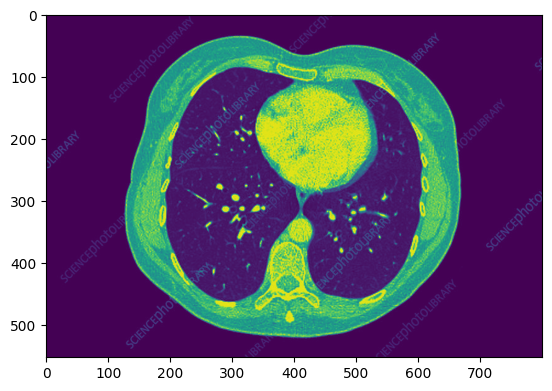

abnormal


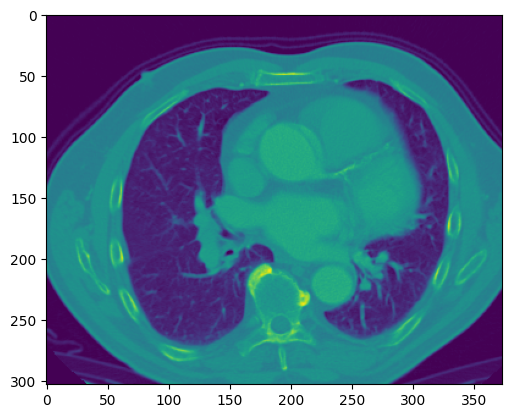

In [7]:
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

**Analyzes the dimensions of images in the dataset by iterating through files in each category and summarizing their sizes.**

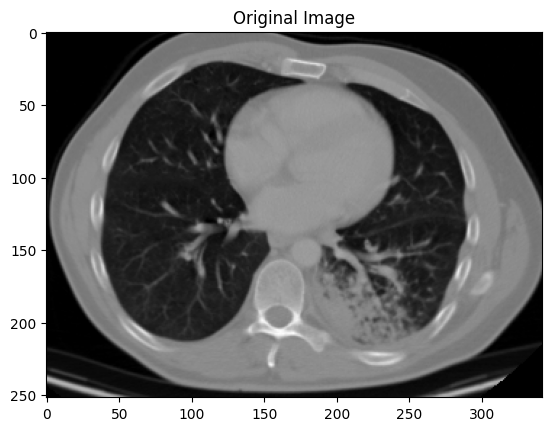

In [14]:
# Load the image
image_path = "/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/abnormal/000002 (4).png"  # Replace with your image path
image = cv2.imread(image_path)

# Convert from BGR to RGB for proper color representation
image_gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image_gray)
plt.title("Original Image")
plt.axis("on")
plt.show()

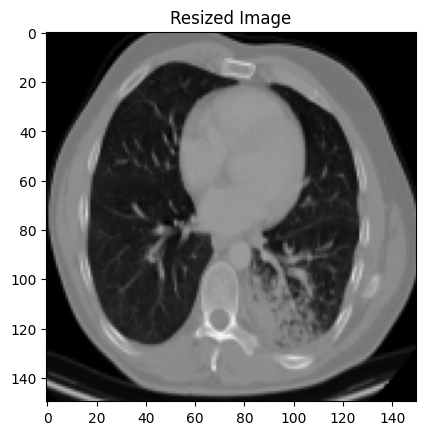

In [9]:
# Resize to a consistent size (e.g., 150x150)
image_resized = cv2.resize(image_gray, (150, 150))

# Display resized image
plt.imshow(image_resized)
plt.title("Resized Image")
plt.axis("on")
plt.show()


**Resizing ensures all images have a consistent dimension, which simplifies further processing and allows them to fit as input to deep learning models (e.g., CNNs expect fixed-size inputs).**



## Applied Gauassian Blur for removal of noise

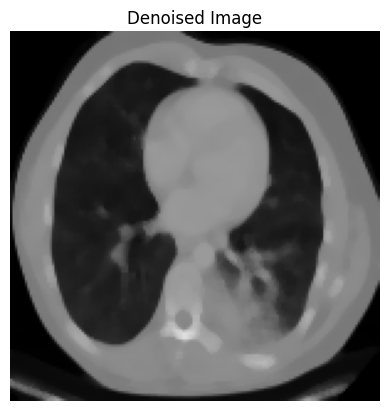

In [15]:
# Apply Gaussian Blur for noise removal
image_denoised_gaussian = cv2.GaussianBlur(image_resized, (5, 5), 0)

# Display denoised image
plt.imshow(image_denoised)
plt.title("Denoised Image")
plt.axis("off")
plt.show()


## Applied Median Blur for removal of noise

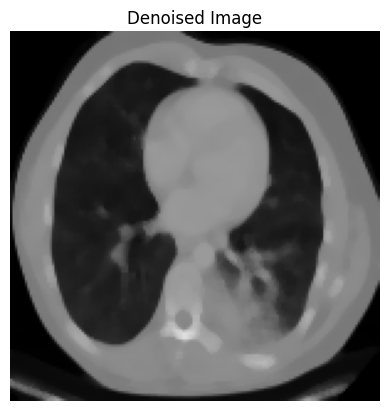

In [11]:
image_denoised = cv2.medianBlur(image_resized, 5)
plt.imshow(image_denoised)
plt.title("Denoised Image")
plt.axis("off")
plt.show()

**The displayed "Denoised Image" is a CT scan of the chest processed using a median blur filter with a kernel size of 5. This technique reduces noise while preserving important edges, making lung structures and abnormalities clearer. The denoising step is crucial for enhancing image quality, ensuring better visualization and preparation for further analysis, such as segmentation or diagnostic model input.**

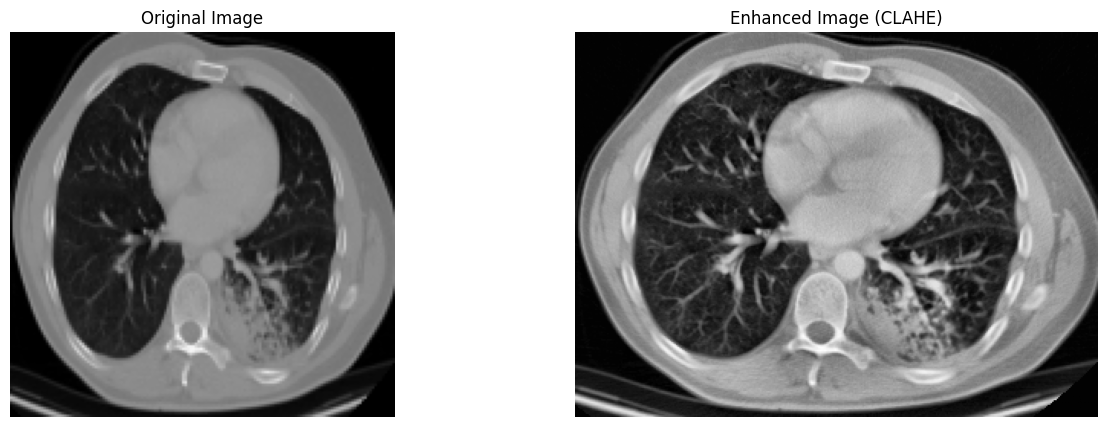

In [16]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) for contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
enhanced_image = clahe.apply(image_gray)


# Display the original, enhanced, and segmented images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_resized, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced Image (CLAHE)")
plt.axis('off')

plt.show()


**Normal Canny Edge**

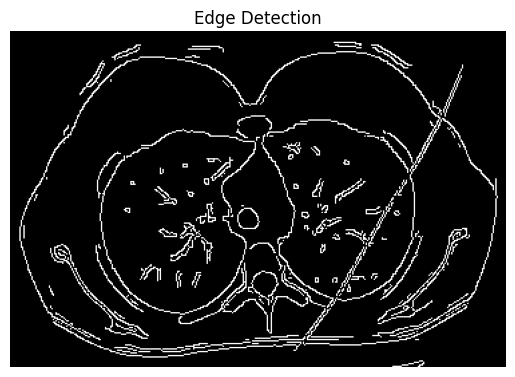

In [17]:
# Convert to grayscale
img = cv2.imread("/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/normal/10 (2) - Copy.png", 0)


# Apply Canny edge detection
edges = cv2.Canny(img, 100, 200)

# Display edges
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()


**Abnormal Canny Edge**

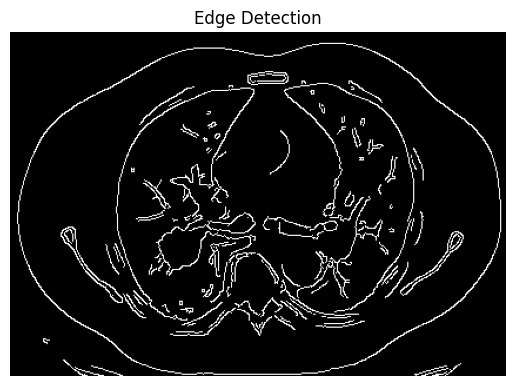

In [18]:
# Convert to grayscale
img = cv2.imread("/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/abnormal/000058 (3).png", 0)


# Apply Canny edge detection
edges = cv2.Canny(img, 100, 200)

# Display edges
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()


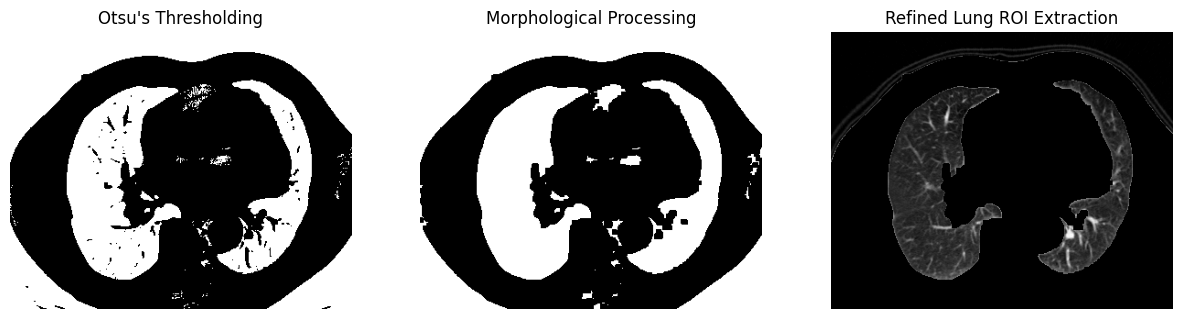

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/abnormal/000049 (3).png"
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply CLAHE (Contrast Enhancement)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(image_gray)

# Step 2: Apply Otsu's Thresholding for better segmentation
_, otsu_thresh = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 3: Apply morphological closing with a smaller kernel to refine lung region
kernel = np.ones((3, 3), np.uint8)  # Smaller kernel to avoid over-removal
morph_close = cv2.morphologyEx(otsu_thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Step 4: Find contours and filter by area to keep lung regions only
contours, _ = cv2.findContours(morph_close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the filtered lung regions
lung_mask_final = np.zeros_like(image_gray)

# Keep contours that are large enough (e.g., area > 5000 pixels)
for cnt in contours:
    if cv2.contourArea(cnt) > 5000:
        cv2.drawContours(lung_mask_final, [cnt], -1, 255, thickness=cv2.FILLED)

# Step 5: Apply the mask to extract the final lung ROI
roi_extracted_refined = cv2.bitwise_and(image_gray, image_gray, mask=lung_mask_final)

# Display updated results
plt.figure(figsize=(15, 5))

# Otsu's Thresholding Result
plt.subplot(1, 3, 1)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

# Morphological Closing Result
plt.subplot(1, 3, 2)
plt.imshow(morph_close, cmap='gray')
plt.title("Morphological Processing")
plt.axis('off')

# Final Refined Lung ROI Extraction
plt.subplot(1, 3, 3)
plt.imshow(roi_extracted_refined, cmap='gray')
plt.title("Refined Lung ROI Extraction")
plt.axis('off')

plt.show()

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the image
def load_image(filepath):
    image = cv2.imread(filepath)
    image_resized = cv2.resize(image, (150, 150))
    return image_resized

# Convert image to grayscale
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# Denoise the image
def denoise_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Segment lungs (dummy function for illustration; replace with actual segmentation method)
def segment_lungs(image):
    # Here you can add any method for segmenting the lungs (e.g., thresholding, region growing, etc.)
    _, segmented_img = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
    return segmented_img



In [9]:

# Preprocess image without normalization
def preprocess_image(filepath):
    # Load the image
    original_img = load_image(filepath)

    # Convert to grayscale
    grayscale_img = convert_to_grayscale(original_img)

    # Apply CLAHE for contrast enhancement
    enhanced_img = apply_clahe(grayscale_img)

    # Denoise the image
    denoised_img = denoise_image(enhanced_img)

    # Segment the lungs
    segmented_img = segment_lungs(denoised_img)



    return {
        # "original": original_img,
        # "grayscale": grayscale_img,
        # "enhanced": enhanced_img,
        # "denoised": denoised_img,
        "segmented": segmented_img,

    }

# Function to display processed images
def display_processed_images(image_dict):
    # Create a list of the keys and corresponding titles
    image_titles = list(image_dict.keys())

    # Number of images to display
    num_images = len(image_dict)

    # Set up the subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # In case we have only one image, ensure axes is an array
    if num_images == 1:
        axes = [axes]

    # Loop through the dictionary and display each image
    for i, (title, img) in enumerate(image_dict.items()):

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img
        axes[i].imshow(img_rgb, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

Heading: Normal


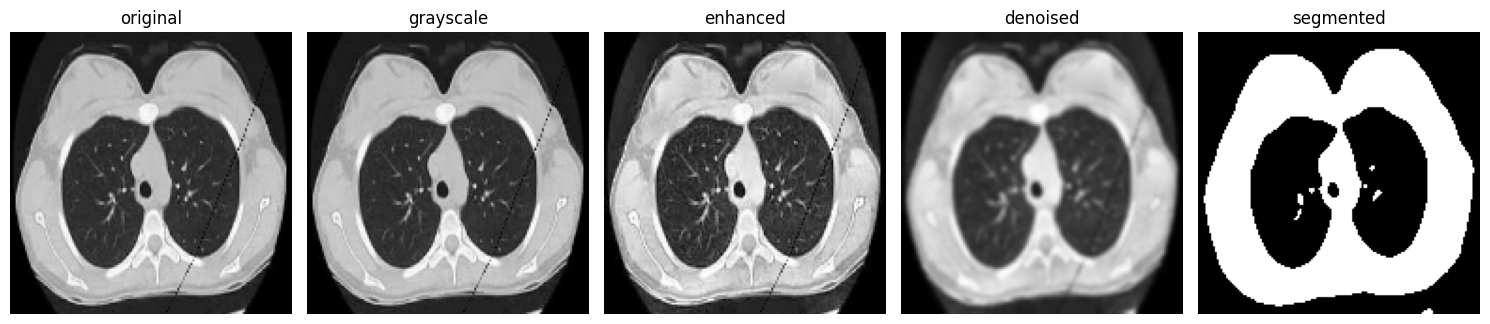

Heading: Normal


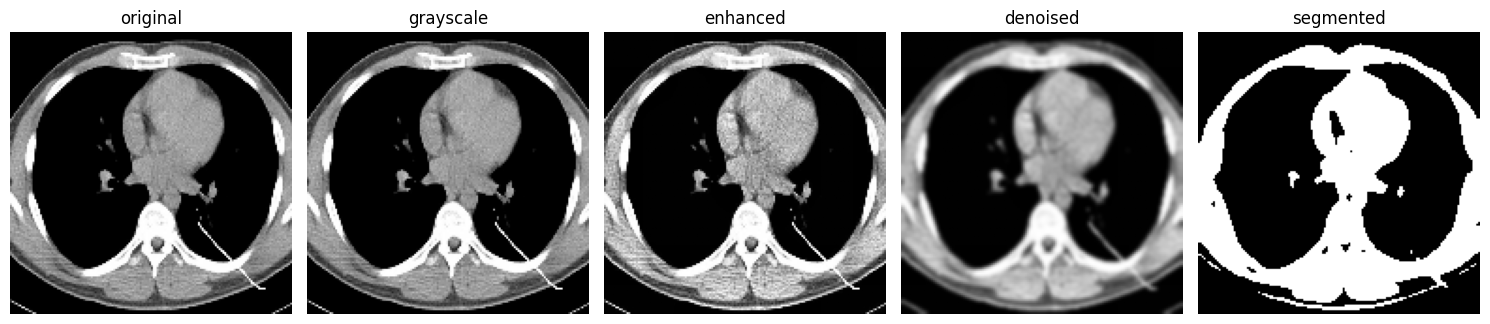

Heading: Normal


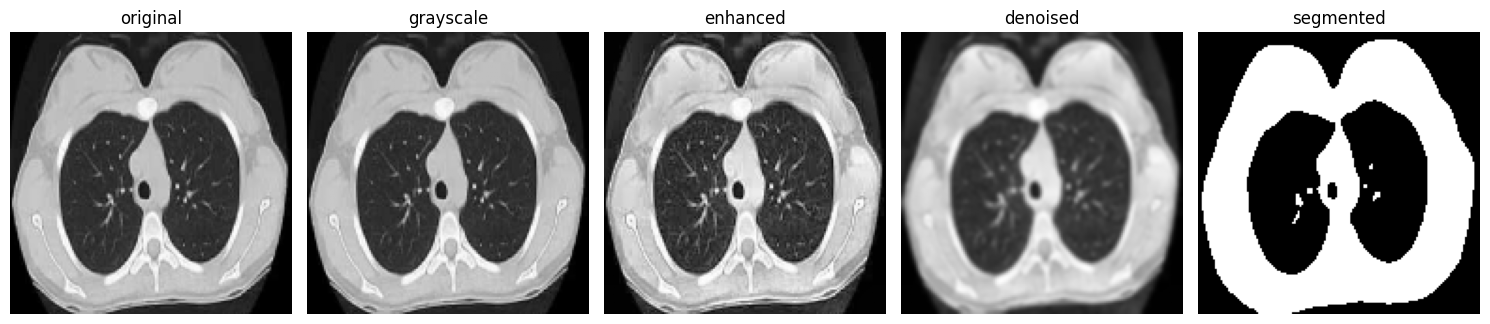

In [24]:
filepaths = ['/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/normal/10 (2) - Copy.png', '/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/normal/4 - Copy (2) - Copy.png', '/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/normal/16.png']

for filepath in filepaths:
    processed_images = preprocess_image(filepath)
    print("Heading: Normal")
    display_processed_images(processed_images)


Heading: Abnormal


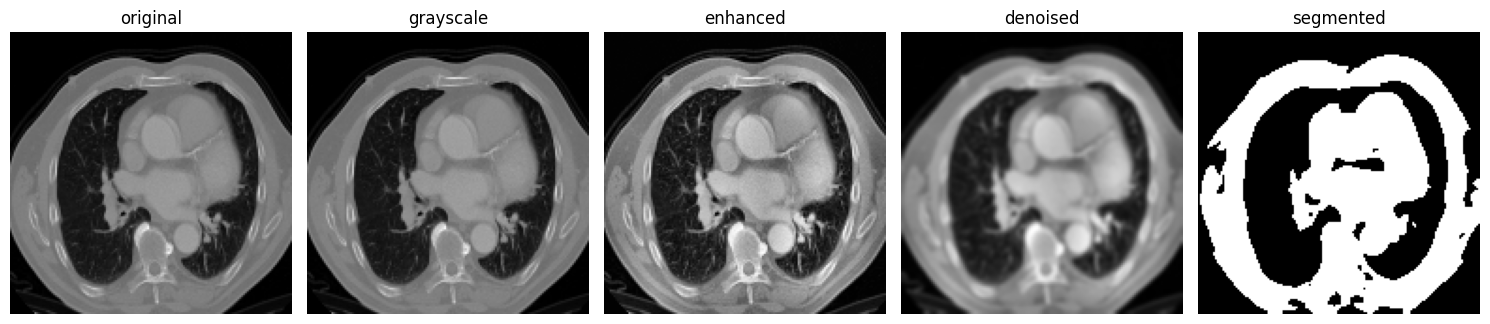

Heading: Abnormal


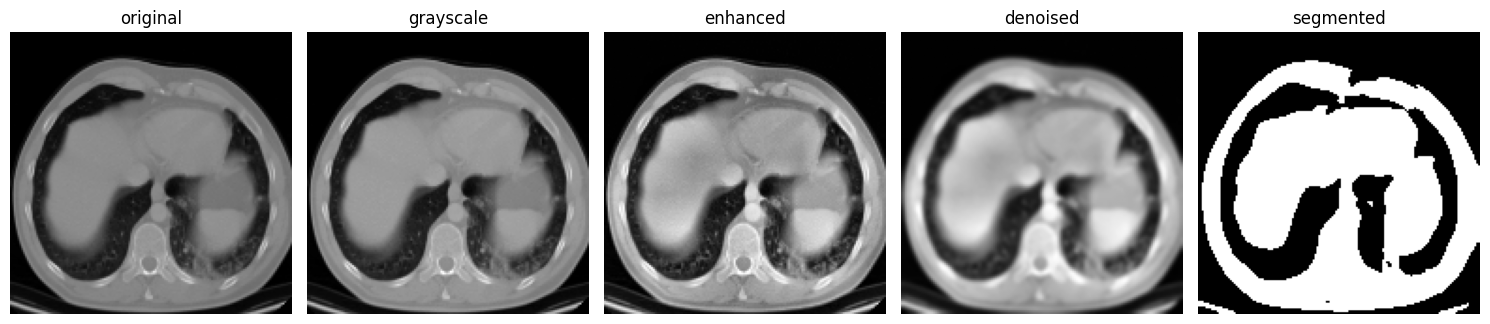

Heading: Abnormal


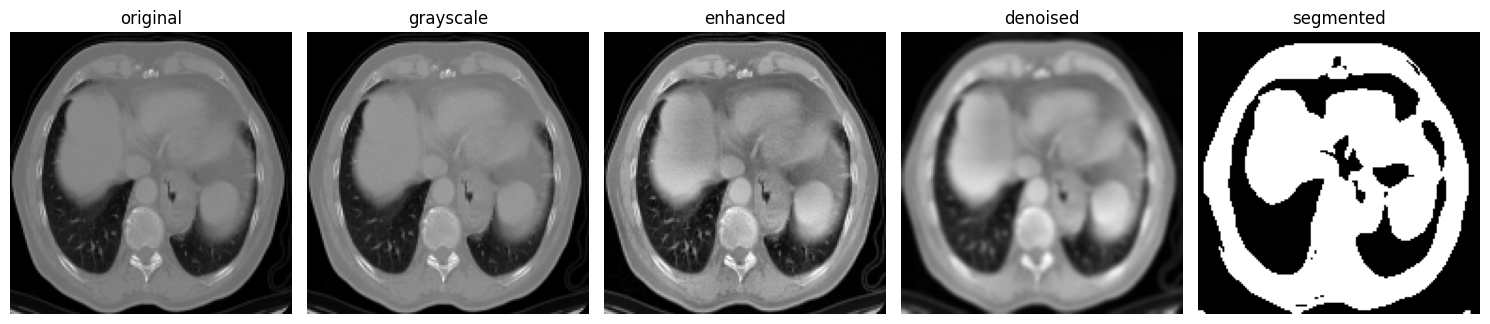

In [25]:
filepaths = ['/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/abnormal/000049 (3).png', '/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/abnormal/000017 (4).png', '/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train/abnormal/000032.png']

for filepath in filepaths:
    processed_images = preprocess_image(filepath)  # Pass filepath as a string
    print("Heading: Abnormal")
    display_processed_images(processed_images)


In [13]:
def save_processed_images(image_dict, save_dir, category, original_filename):
    """Save the processed images into category folders with the original filename."""
    # Ensure the category folder exists
    category_dir = os.path.join(save_dir, category)
    os.makedirs(category_dir, exist_ok=True)

    # Save each processed image
    for step, img in image_dict.items():
        # Save using the original filename and processing step
        filename = os.path.join(category_dir, f"{os.path.splitext(original_filename)[0]}_{step}.png")
        cv2.imwrite(filename, img)

def process_and_save_images(input_folder, output_folder):
    """Process all images in the input folder and save them in respective categories."""
    for category in os.listdir(input_folder):  # 'normal' and 'abnormal' folders
        category_path = os.path.join(input_folder, category)

        # Check if it's a folder
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                filepath = os.path.join(category_path, filename)

                # Skip non-image files
                if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    continue

                # Preprocess the image
                processed_images = preprocess_image(filepath)

                # Save the processed images with the original filename
                save_processed_images(processed_images, output_folder, category, filename)

# Example usage
input_folder = "/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/train"  # Path to the 'train' folder
output_folder = "/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/ProcessImage"  # Path to save processed images
process_and_save_images(input_folder, output_folder)


In [15]:
print("Segmented Train Image is Saved in the Folder")

Segmented Train Image is Saved in the Folder


In [16]:
def save_processed_images(image_dict, save_dir, category, original_filename):
    """Save the processed images into category folders with the original filename."""
    # Ensure the category folder exists
    category_dir = os.path.join(save_dir, category)
    os.makedirs(category_dir, exist_ok=True)

    # Save each processed image
    for step, img in image_dict.items():
        # Save using the original filename and processing step
        filename = os.path.join(category_dir, f"{os.path.splitext(original_filename)[0]}_{step}.png")
        cv2.imwrite(filename, img)

def process_and_save_images(input_folder, output_folder):
    """Process all images in the input folder and save them in respective categories."""
    for category in os.listdir(input_folder):  # 'normal' and 'abnormal' folders
        category_path = os.path.join(input_folder, category)

        # Check if it's a folder
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                filepath = os.path.join(category_path, filename)

                # Skip non-image files
                if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    continue

                # Preprocess the image
                processed_images = preprocess_image(filepath)

                # Save the processed images with the original filename
                save_processed_images(processed_images, output_folder, category, filename)

# Example usage
input_folder = "/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/test"  # Path to the 'train' folder
output_folder = "/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/ProcessImage_test"  # Path to save processed images
process_and_save_images(input_folder, output_folder)
print("Segmented Test Image is Saved in the Folder")

Segmented Test Image is Saved in the Folder


In [20]:
def load_data():

    datasets = [r'/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/ProcessImage_train', r'/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/ProcessImage_test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [21]:
def suggestions1():
    if (pred_labels==0):
        print("NORMAL:Everything looks fine")
        print("Go for regular checkup")
    elif (pred_labels==1):
        print("ABNORMAL:Seems to have cancer")
        print("Consult the doctor immediately")

In [22]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/ProcessImage_train


100%|██████████| 155/155 [00:01<00:00, 123.46it/s]


Loading /content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/ProcessImage_test


100%|██████████| 89/89 [00:00<00:00, 164.36it/s]


In [23]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [24]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 303
Number of testing examples: 166
Each image is of size: (150, 150)


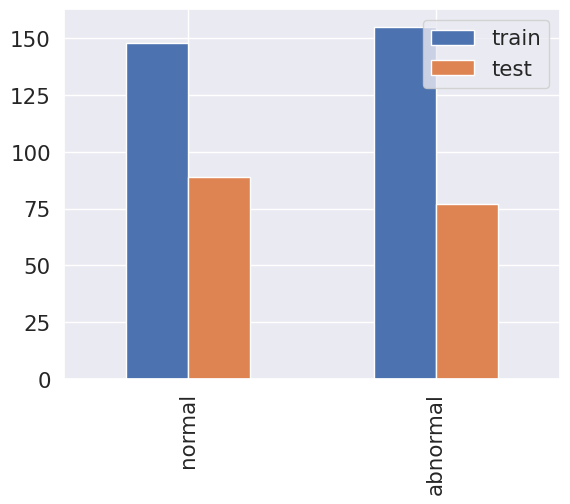

In [25]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

In [26]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [27]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with its corresponding labels
    """
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

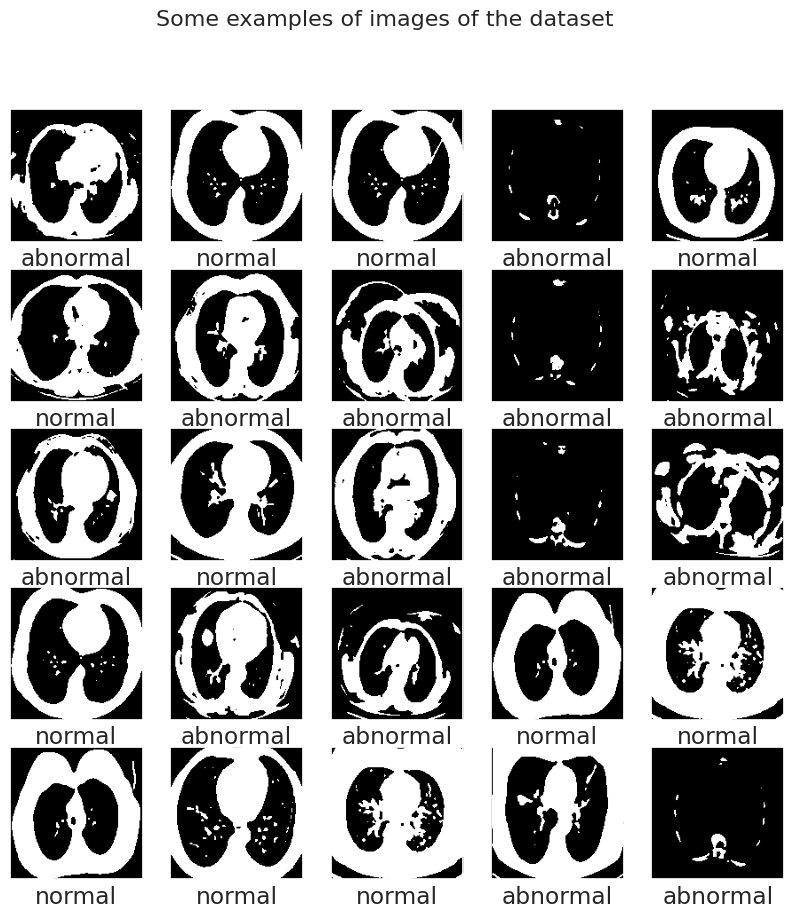

In [32]:
display_examples(class_names, train_images, train_labels)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.2956 - loss: 1.7178 - val_accuracy: 0.4754 - val_loss: 8.0558
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.5931 - loss: 4.9955 - val_accuracy: 0.6230 - val_loss: 3.0730
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5784 - loss: 3.5828 - val_accuracy: 0.6557 - val_loss: 1.7485
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.6520 - loss: 1.4044 - val_accuracy: 0.8852 - val_loss: 0.2597
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8451 - loss: 0.3753 - val_accuracy: 0.6721 - val_loss: 0.9388
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7159 - loss: 0.7317 - val_accuracy: 0.6885 - val_loss: 0.5530
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.8062 - loss: 0.3719 - val_accuracy: 0.9180 - val_loss: 0.1957
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.9731 - loss: 0.1337 - val_accuracy: 1.0000 - val_loss: 0.1149
Epoch 9/30
2

In [37]:
test_loss = model.evaluate(test_images, test_labels)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 1.0000 - loss: 2.3360e-04


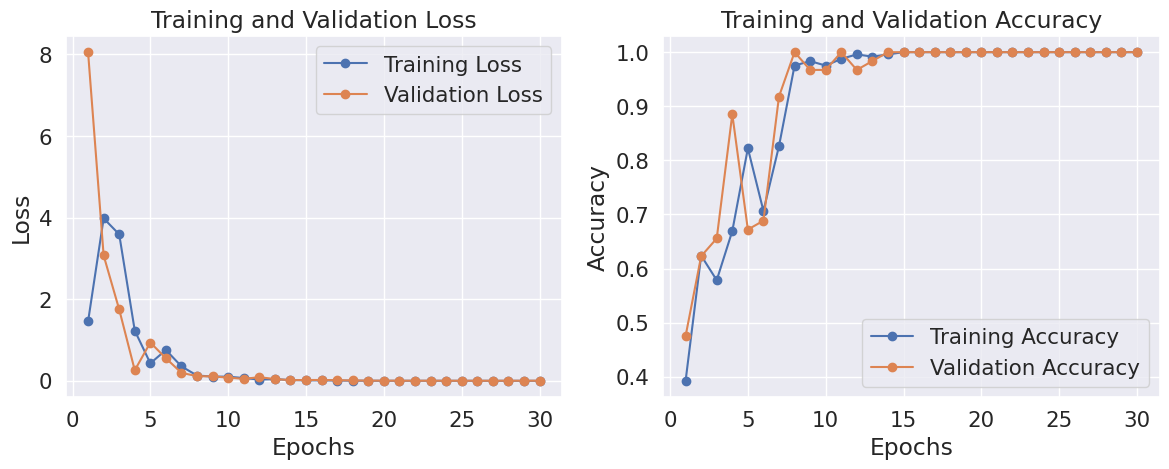

In [36]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from model.fit()
def plot_training_history(history):
    """Plots the training and validation loss and accuracy."""
    # Extract loss and accuracy data
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    training_accuracy = history.history.get('accuracy') or history.history.get('acc')  # Handle different naming conventions
    validation_accuracy = history.history.get('val_accuracy') or history.history.get('val_acc')

    epochs = range(1, len(training_loss) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(12, 5))

    # Subplot for loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_loss, label='Training Loss', marker='o')
    plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Subplot for accuracy
    if training_accuracy and validation_accuracy:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
        plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
ABNORMAL:Seems to have cancer
Consult the doctor immediately
[1]


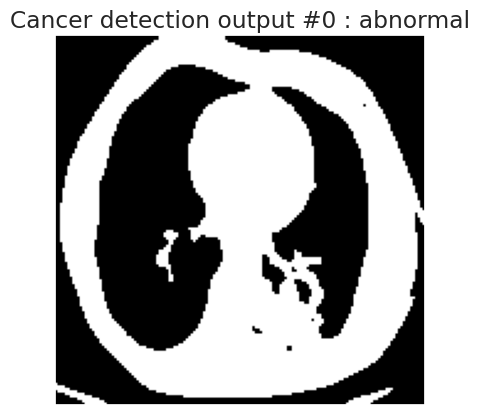

In [39]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/ProcessImage_test/abnormal/000002 (4)_segmented.png", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
suggestions1()
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Cancer detection output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
NORMAL:Everything looks fine
Go for regular checkup
[0]


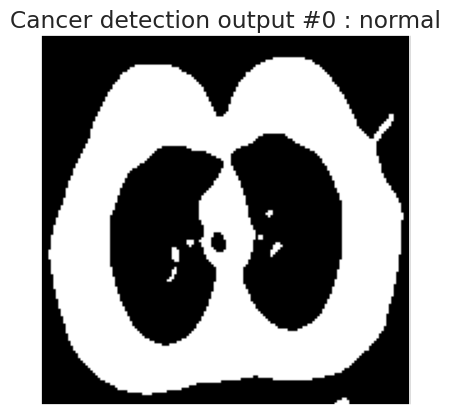

In [40]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"/content/drive/MyDrive/Lung-Cancer-detection/Lung-Cancer-Detection/ProcessImage_test/normal/10 - Copy_segmented.png", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
suggestions1()
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Cancer detection output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

([<matplotlib.patches.Wedge at 0x7f910b580810>,
 [Text(0.03990911956276208, 1.0992757898615457, 'normal'),
  Text(-0.039909119562761976, -1.0992757898615457, 'abnormal')])

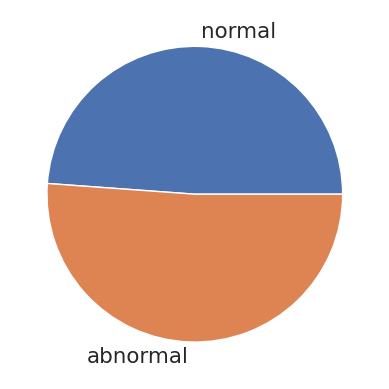

In [41]:
plt.pie(train_counts, explode=(0,0,), labels=class_names)